<a href="https://colab.research.google.com/github/AlonVery/Model-s_for_Diploma/blob/main/Final_model_for_diploma_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
!pip install scapy
!pip install mocket
!pip install lime
!pip install shap
!pip install pickle
!pip install watchdog

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 2.7 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import IsolationForest
from sklearn.compose import ColumnTransformer
from tensorflow.keras.metrics import Accuracy
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import LearningRateScheduler
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import OrdinalEncoder
import pickle
import joblib
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import lime
import lime.lime_tabular
import shap
import plotly.graph_objs as go
import socket
from scapy.all import sniff
from unittest.mock import patch
import random
from xgboost import XGBClassifier


In [66]:
df = pd.read_csv("https://raw.githubusercontent.com/MaStErDias/DataSets/main/KDDTest%2B%20(3)%20%E2%80%94%20%D0%BA%D0%BE%D0%BF%D0%B8%D1%8F.csv")
df.head()

,0;udp;private;SF;54;52;0;0;260;260;0;0;0;0;1;0;0;255;255;1;0;0.99;0;0;0;0;0;normal
0,0;tcp;http;SF;226;2973;0;0;14;15;0;0;0;0;1;0;0...
1,0;udp;private;SF;54;52;0;0;511;511;0;0;0;0;1;0...
2,0;tcp;http;SF;286;389;0;0;2;10;0;0;0;0;1;0;0.4...
3,0;tcp;http;SF;54540;8314;0;0;3;3;0;0;0;0;1;0;0...
4,0;tcp;domain;REJ;0;0;0;0;281;18;0;0;1;1;0.06;0...


In [112]:
import pandas as pd

# Чтение CSV файла с разделителем ';'
df = pd.read_csv('https://raw.githubusercontent.com/MaStErDias/DataSets/main/KDDTest%2B%20(3)%20%E2%80%94%20%D0%BA%D0%BE%D0%BF%D0%B8%D1%8F.csv', delimiter=';')

# Сохранение CSV файла с разделителем ','
df.to_csv('train_start_v1.csv', index=False, sep=',')

In [114]:
df = pd.read_csv("/content/train_start_v1.csv")
columns = (["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "wrong_fragment", "urgent", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "attack"])
df.columns = columns
df.head(20)



,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,urgent,count,srv_count,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,http,SF,226,2973,0,0,14,15,...,255,1.00,0.00,0.02,0.01,0.00,0.00,0.00,0.00,normal
1,0,udp,private,SF,54,52,0,0,511,511,...,255,1.00,0.00,0.78,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,http,SF,286,389,0,0,2,10,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
3,0,tcp,http,SF,54540,8314,0,0,3,3,...,245,0.96,0.01,0.00,0.00,0.00,0.00,0.06,0.06,anomaly
4,0,tcp,domain,REJ,0,0,0,0,281,18,...,18,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
5,7605,tcp,telnet,SF,0,44,0,0,1,7,...,174,0.68,0.03,0.00,0.00,0.33,0.48,0.11,0.07,anomaly
6,0,tcp,private,REJ,0,0,0,0,294,20,...,20,0.08,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
7,0,tcp,ftp_data,SF,868,0,0,0,1,1,...,45,0.19,0.02,0.19,0.00,0.00,0.00,0.01,0.00,normal
8,0,tcp,ldap,REJ,0,0,0,0,101,8,...,8,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
9,0,icmp,eco_i,SF,20,0,0,0,1,65,...,57,1.00,0.00,1.00,0.26,0.00,0.00,0.00,0.00,anomaly


In [115]:
# Перемешивание строк
df = df.sample(frac=1).reset_index(drop=True)

In [116]:
df.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,urgent,count,srv_count,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,http_443,SF,2329,6513,0,0,0,0,...,0,30.00,0.00,0.00,0.00,1.00,0.0,0.30,0.00,normal
1,0,tcp,telnet,OTH,154,0,0,0,0,9387,...,100,100.00,1.00,0.00,0.00,0.00,0.0,0.00,0.00,anomaly
2,0,tcp,private,REJ,0,0,0,0,113,1,...,1,0.01,0.53,0.96,0.00,0.00,0.0,0.96,1.00,anomaly
3,0,tcp,telnet,OTH,154,0,0,0,0,8596,...,100,100.00,1.00,0.00,0.00,0.00,0.0,0.00,0.00,anomaly
4,0,tcp,http,OTH,154,0,0,0,0,5657,...,100,100.00,1.00,0.00,0.00,0.00,0.0,0.00,0.00,anomaly
5,0,tcp,telnet,SF,122,174,0,0,1,1,...,154,0.60,0.02,0.00,0.00,0.00,0.0,0.02,0.03,anomaly
6,0,tcp,ssh,OTH,154,0,0,0,0,725,...,100,100.00,1.00,0.00,0.00,0.00,0.0,0.00,0.00,anomaly
7,0,udp,domain_u,SF,110,177,0,0,0,30,...,88,88.00,1.00,0.00,0.00,0.00,0.0,0.00,0.00,normal
8,0,udp,domain_u,SF,87,144,0,0,0,17,...,97,97.00,1.00,0.00,0.00,0.00,0.0,0.00,0.00,normal
9,0,udp,domain_u,SF,108,124,0,0,0,36,...,88,88.00,1.00,0.00,0.00,0.00,0.0,0.00,0.00,normal


In [117]:
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()

le_protocol_type = le1.fit(df['protocol_type'])
le_service = le2.fit(df['service'])
le_flag = le3.fit(df['flag'])
le_attack = le4.fit(df['attack'])

df['protocol_type'] = le_protocol_type.transform(df['protocol_type'])
df['service'] = le_service.transform(df['service'])
df['flag'] = le_flag.transform(df['flag'])
df['attack'] = le_attack.transform(df['attack'])

In [118]:
y_train= df[['attack']]
X_train= df.drop(labels=['attack'], axis=1)
print('X_train has shape:',X_train.shape,'\ny_train has shape:',y_train.shape)

X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=28)

X_train has shape: (22373, 27) 
y_train has shape: (22373, 1)


In [119]:
xg = XGBClassifier(n_estimators=100, learning_rate=1, objective='reg:absoluteerror', random_state=28)
xg = xg.fit(X_train, y_train)
xg_pred = xg.predict(X_test)
print(xg_pred)
xg_acc = accuracy_score(y_test, xg_pred)
print(xg_acc)


[0 1 1 ... 1 0 0]
0.986145251396648


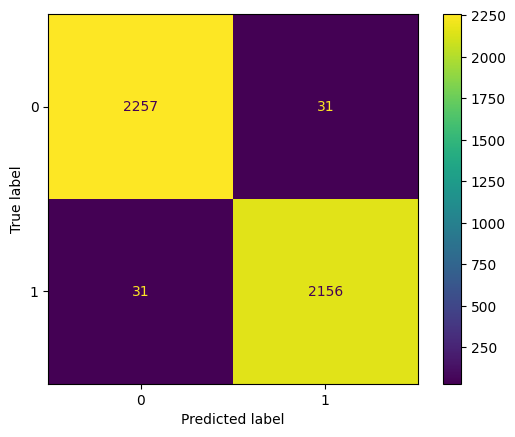

In [120]:
xg_cm = confusion_matrix(y_test, xg_pred)
ConfusionMatrixDisplay(xg_cm).plot()

In [121]:
filename = 'best_model.sav'
pickle.dump(xg, open(filename, 'wb'))

In [122]:
import pandas as pd

# Чтение CSV файла с разделителем ';'
df_test = pd.read_csv('/content/data — копия (1).csv', delimiter=';')

# Сохранение CSV файла с разделителем ','
df_test.to_csv('test_end_v1.csv', index=False, sep=',')
df_test = pd.read_csv('/content/test_end_v1.csv')
columns = (["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "wrong_fragment", "urgent", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate"])
df_test.columns = columns
df_test.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,urgent,count,srv_count,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,http_443,SF,2170,1455,0,0,0,0,...,1.00,0,1,0.0,0.0,0.0,1.00,0.0,0.0,0.0
1,2,tcp,http_443,SF,2274,6323,0,0,0,0,...,1.00,0,2,0.0,0.0,0.0,1.00,0.0,0.0,0.0
2,0,tcp,http_443,RSTR,2665,6592,0,0,0,0,...,1.00,0,3,0.0,0.0,0.0,1.00,0.0,0.0,0.0
3,0,tcp,http_443,RSTR,2657,6592,0,0,0,1,...,0.50,1,4,1.0,0.0,0.0,0.75,0.0,0.0,0.0
4,0,tcp,http_443,RSTR,2765,6646,0,0,0,2,...,0.33,2,5,1.0,0.0,0.0,0.60,0.0,0.0,0.0
5,0,tcp,http_443,RSTR,2665,6592,0,0,0,3,...,0.25,3,6,1.0,0.0,0.0,0.50,0.0,0.0,0.0
6,0,tcp,http_443,RSTR,2657,6592,0,0,0,4,...,0.20,4,7,1.0,0.0,0.0,0.43,0.0,0.0,0.0
7,0,tcp,http_443,RSTR,2719,6646,0,0,0,5,...,0.17,5,8,1.0,0.0,0.0,0.38,0.0,0.0,0.0
8,0,tcp,ssh,OTH,154,0,0,0,0,0,...,0.00,0,0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
9,0,tcp,ssh,OTH,154,0,0,0,0,1,...,0.00,1,1,1.0,0.0,0.0,0.00,0.0,0.0,0.0


In [123]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5710 entries, 0 to 5709
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     5710 non-null   int64  
 1   protocol_type                5710 non-null   object 
 2   service                      5710 non-null   object 
 3   flag                         5710 non-null   object 
 4   src_bytes                    5710 non-null   int64  
 5   dst_bytes                    5710 non-null   int64  
 6   wrong_fragment               5710 non-null   int64  
 7   urgent                       5710 non-null   int64  
 8   count                        5710 non-null   int64  
 9   srv_count                    5710 non-null   int64  
 10  serror_rate                  5710 non-null   int64  
 11  srv_serror_rate              5710 non-null   float64
 12  rerror_rate                  5710 non-null   float64
 13  srv_rerror_rate   

In [124]:
loaded_model = pickle.load(open(filename, 'rb'))

In [125]:
def intrusion_check(packet):
    packet[1] = le_protocol_type.transform([packet[1]])[0]
    packet[2] = le_service.transform([packet[2]])[0]
    packet[3] = le_flag.transform([packet[3]])[0]
    pred = loaded_model.predict(np.reshape(packet, (1, 27)))
    predicted = le_attack.inverse_transform(pred)

    return predicted[0]

In [126]:
def capture_packet(count=float('inf')):
    filtered_packets = []
    packet_counter = 0

    def handle_sniffed_packet(packet):
        nonlocal packet_counter
        # Убедимся, что не превышаем размер df_test
        if packet_counter >= len(df_test):
            print("Reached the end of df_test.")
            return

        check = intrusion_check(list(df_test.iloc[packet_counter]))
        packet_counter += 1

        if check == 'normal':
            filtered_packets.append(packet)
            print(f'Packet Safe, From [{packet.src}] To [{packet.dst}]')
        else:
            print(f'Caution! Found {check}, From [{packet.src}] To [{packet.dst}]')

    # Start capturing packets using sniff
    sniff(prn=handle_sniffed_packet, count=count)

    return filtered_packets


In [128]:
# Capture 20 pack ets and receive the safe packets
packets = capture_packet()

Packet Safe, From [02:42:43:46:f5:49] To [02:42:ac:1c:00:0c]
Packet Safe, From [02:42:ac:1c:00:0c] To [02:42:43:46:f5:49]
Packet Safe, From [02:42:ac:1c:00:0c] To [02:42:43:46:f5:49]
Packet Safe, From [02:42:43:46:f5:49] To [02:42:ac:1c:00:0c]
Packet Safe, From [02:42:43:46:f5:49] To [02:42:ac:1c:00:0c]
Packet Safe, From [02:42:43:46:f5:49] To [02:42:ac:1c:00:0c]
Packet Safe, From [02:42:ac:1c:00:0c] To [02:42:43:46:f5:49]
Packet Safe, From [02:42:ac:1c:00:0c] To [02:42:43:46:f5:49]
Packet Safe, From [02:42:43:46:f5:49] To [02:42:ac:1c:00:0c]
Caution! Found anomaly, From [02:42:43:46:f5:49] To [02:42:ac:1c:00:0c]
Caution! Found anomaly, From [02:42:ac:1c:00:0c] To [02:42:43:46:f5:49]
Caution! Found anomaly, From [02:42:43:46:f5:49] To [02:42:ac:1c:00:0c]
Caution! Found anomaly, From [02:42:43:46:f5:49] To [02:42:ac:1c:00:0c]
Caution! Found anomaly, From [02:42:43:46:f5:49] To [02:42:ac:1c:00:0c]
Caution! Found anomaly, From [02:42:ac:1c:00:0c] To [02:42:43:46:f5:49]
Caution! Found anom

In [129]:
packets[10]

<Ether  dst=02:42:ac:1c:00:0c src=02:42:43:46:f5:49 type=IPv4 |<IP  version=4 ihl=5 tos=0x0 len=52 id=31570 flags=DF frag=0 ttl=64 proto=6 chksum=0x672c src=172.28.0.1 dst=172.28.0.12 |<TCP  sport=48110 dport=8080 seq=4104503213 ack=1653780391 dataofs=8 reserved=0 flags=A window=249 chksum=0x586c urgptr=0 options=[('NOP', None), ('NOP', None), ('Timestamp', (3936419762, 631406119))] |>>>

Packet Safe, From [02:42:43:46:f5:49] To [02:42:ac:1c:00:0c]
Caution! Found anomaly, From [02:42:ac:1c:00:0c] To [02:42:43:46:f5:49]
Packet Safe, From [02:42:43:46:f5:49] To [02:42:ac:1c:00:0c]
Caution! Found anomaly, From [02:42:ac:1c:00:0c] To [02:42:43:46:f5:49]
Packet Safe, From [02:42:43:46:f5:49] To [02:42:ac:1c:00:0c]
Caution! Found anomaly, From [02:42:43:46:f5:49] To [02:42:ac:1c:00:0c]
Packet Safe, From [02:42:ac:1c:00:0c] To [02:42:43:46:f5:49]
Caution! Found anomaly, From [02:42:ac:1c:00:0c] To [02:42:43:46:f5:49]
Packet Safe, From [02:42:43:46:f5:49] To [02:42:ac:1c:00:0c]
Caution! Found anomaly, From [02:42:ac:1c:00:0c] To [02:42:43:46:f5:49]
Packet Safe, From [02:42:43:46:f5:49] To [02:42:ac:1c:00:0c]
Caution! Found anomaly, From [02:42:43:46:f5:49] To [02:42:ac:1c:00:0c]
Packet Safe, From [02:42:ac:1c:00:0c] To [02:42:43:46:f5:49]
Caution! Found anomaly, From [02:42:43:46:f5:49] To [02:42:ac:1c:00:0c]
Packet Safe, From [02:42:43:46:f5:49] To [02:42:ac:1c:00:0c]
Caution!

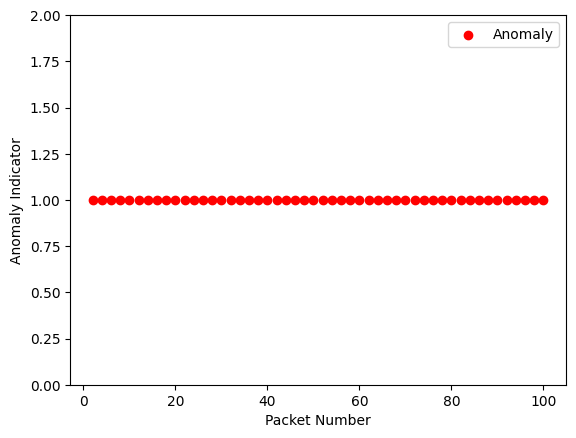

In [137]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
from scapy.all import sniff
import random
from watchdog.observers import Observer
from watchdog.events import FileSystemEventHandler

# Заглушка для intrusion_check (предполагается, что у вас есть реализация этой функции)
def intrusion_check(packet_data):
    return 'normal' if sum(packet_data) % 2 == 0 else 'anomaly'

# Заглушка для df_test (предполагается, что у вас есть DataFrame)
df_test = pd.DataFrame({'data': range(100)})

def capture_packet(count=float('inf')):
    filtered_packets = []
    packet_counter = 0

    def handle_sniffed_packet(packet):
        nonlocal packet_counter
        # Убедимся, что не превышаем размер df_test
        if packet_counter >= len(df_test):
            print("Reached the end of df_test.")
            return

        check = intrusion_check(list(df_test.iloc[packet_counter]))
        packet_counter += 1

        if check == 'normal':
            filtered_packets.append(packet)
            print(f'Packet Safe, From [{packet.src}] To [{packet.dst}]')
        else:
            print(f'Caution! Found {check}, From [{packet.src}] To [{packet.dst}]')

    # Start capturing packets using sniff
    sniff(prn=handle_sniffed_packet, count=count)

    return filtered_packets


class FileHandler(FileSystemEventHandler):
    def __init__(self, monitor):
        self.monitor = monitor

    def on_modified(self, event):
        if event.src_path.endswith('filtered_packets.csv'):
            self.monitor.update_data()

class AnomalyMonitor:
    def __init__(self):
        self.fig, self.ax = plt.subplots()

        self.data = pd.DataFrame()

        self.observer = Observer()
        self.handler = FileHandler(self)
        self.observer.schedule(self.handler, '.', recursive=False)
        self.observer.start()

        # Initial load of data
        self.update_data()

    def update_data(self):
        self.data = pd.read_csv('filtered_packets.csv')
        self.update_plot()

    def update_plot(self):
        self.ax.clear()
        if not self.data.empty:
            anomalies = self.data[self.data['status'] != 'safe']
            x = anomalies['packet_number']
            y = [1] * len(anomalies)
            self.ax.scatter(x, y, color='red', label='Anomaly')

        self.ax.set_ylim(0, 2)
        self.ax.set_xlabel("Packet Number")
        self.ax.set_ylabel("Anomaly Indicator")
        self.ax.legend()
        plt.savefig('anomaly_plot.png')

    def on_closing(self):
        self.observer.stop()
        self.observer.join()

if __name__ == "__main__":
    # Capture 20 packets and save the safe packets
    packets = capture_packet()

    app = AnomalyMonitor()

    # Instead of starting a main loop, we can update the plot manually.
    app.update_plot()
    app.on_closing()
